In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
data = pd.read_csv('2018-data-for-consulates.csv')


In [3]:
print(data.describe())

       Not issued rate for ATVs and uniform visas   Visa Application Outcome
count                                   971.000000                971.000000
mean                                     14.345211                 85.642019
std                                      14.719182                 14.722724
min                                       0.100000                 13.200000
25%                                       2.900000                 78.850000
50%                                       9.200000                 90.800000
75%                                      21.200000                 97.100000
max                                      86.800000                 99.900000


In [4]:
print(data.isnull().sum())
data = data.drop('Not issued rate for uniform visas', axis=1)


Schengen State                                                                       7
Country where consulate is located                                                   7
Consulate                                                                            4
Airport transit visas (ATVs) applied for                                          1524
 ATVs issued (including multiple)                                                 1567
Multiple ATVs issued                                                              1768
ATVs not issued                                                                   1796
Not issued rate for ATVs                                                          1797
Uniform visas applied for                                                            8
Total  uniform visas issued (including MEV) \n                                      48
Multiple entry uniform visas (MEVs) issued                                         141
Share of MEVs on total number of uniform vi

In [5]:
data.dropna(inplace=True)

In [6]:
print(data.isnull().sum())

Schengen State                                                                    0
Country where consulate is located                                                0
Consulate                                                                         0
Airport transit visas (ATVs) applied for                                          0
 ATVs issued (including multiple)                                                 0
Multiple ATVs issued                                                              0
ATVs not issued                                                                   0
Not issued rate for ATVs                                                          0
Uniform visas applied for                                                         0
Total  uniform visas issued (including MEV) \n                                    0
Multiple entry uniform visas (MEVs) issued                                        0
Share of MEVs on total number of uniform visas issued                       

In [7]:
# Encode categorical features using label encoding
label_encoder = LabelEncoder()
data['Schengen State'] = label_encoder.fit_transform(data['Schengen State'])
data['Country where consulate is located'] = label_encoder.fit_transform(data['Country where consulate is located'])
data['Consulate'] = label_encoder.fit_transform(data['Consulate'])

In [8]:
def clean_and_convert_to_float(value):
    try:
        # Remove '%' symbol and any non-numeric characters, then convert to float
        return float(''.join(filter(str.isdigit, str(value))))
    except ValueError:
        # Handle missing values or other non-numeric cases
        return None

# Apply the cleaning and conversion function to the column
data['Share of MEVs on total number of uniform visas issued'] = data['Share of MEVs on total number of uniform visas issued'].apply(clean_and_convert_to_float)
data['Not issued rate for ATVs'] = data['Not issued rate for ATVs'].apply(clean_and_convert_to_float)
data['Total ATVs and uniform visas applied for'] = data['Total ATVs and uniform visas applied for'].apply(clean_and_convert_to_float)
data['Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) '] = data['Total ATVs and uniform visas issued  (including multiple ATVs, MEVs and LTVs) '].apply(clean_and_convert_to_float)
data['Total ATVs and uniform visas not issued'] = data['Total ATVs and uniform visas not issued'].apply(clean_and_convert_to_float)

In [10]:
for column in data.columns:
    if data[column].dtype == 'object':
        non_numeric_count = sum(data[column].str.contains('[^0-9.]', na=True))
        if non_numeric_count > 0:
            print(f"Column '{column}' contains {non_numeric_count} non-numeric values.")

In [14]:
X = data.drop('Visa Application Outcome', axis=1)
y = data['Visa Application Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#data['Not issued rate for ATVs'] = data['Not issued rate for ATVs'].str.replace('%', '').astype(float)
#data['Share of MEVs on total number of uniform visas issued'] = data['Share of MEVs on total number of uniform visas issued'].str.replace('%', '').astype(float)

In [16]:
data


,Schengen State,Country where consulate is located,Consulate,Airport transit visas (ATVs) applied for,ATVs issued (including multiple),Multiple ATVs issued,ATVs not issued,Not issued rate for ATVs,Uniform visas applied for,Total uniform visas issued (including MEV) \n,Multiple entry uniform visas (MEVs) issued,Share of MEVs on total number of uniform visas issued,Total LTVs issued,Uniform visas not issued,Total ATVs and uniform visas applied for,"Total ATVs and uniform visas issued (including multiple ATVs, MEVs and LTVs)",Total ATVs and uniform visas not issued,Not issued rate for ATVs and uniform visas,Visa Application Outcome
586,0,0,15,4,3,3,1,2500.0,5252,4659,4540,9740.0,3,590,5256.0,4665.0,591.0,2.6,97.4
593,0,1,1,6,4,4,2,3330.0,6406,4374,1022,2340.0,10,2022,6412.0,4388.0,2024.0,12.7,87.3
599,0,2,3,36,34,31,2,560.0,33707,31277,25611,8190.0,55,2375,33743.0,31366.0,2377.0,59.5,40.5
600,0,2,5,44,33,24,11,2500.0,22089,20397,16558,8120.0,9,1683,22133.0,20439.0,1694.0,37.8,61.4
602,0,2,13,176,154,114,22,1250.0,57900,54082,42711,7900.0,5,3813,58076.0,54241.0,3835.0,28.3,71.7
603,0,2,14,136,109,97,27,1990.0,45808,40107,39190,9770.0,165,5536,45944.0,40381.0,5563.0,17.0,82.5
605,0,3,16,107,102,93,5,470.0,53647,42453,22587,5320.0,209,10985,53754.0,42764.0,10990.0,1.1,98.9
611,0,4,10,33,30,17,3,910.0,1344,1201,1189,9900.0,3,140,1377.0,1234.0,143.0,30.6,69.3
623,0,5,4,15,12,12,3,2000.0,10971,7370,7193,9760.0,189,3412,10986.0,7571.0,3415.0,6.1,93.9
629,0,6,12,69,67,51,2,290.0,185,180,167,9280.0,4,1,254.0,251.0,3.0,53.3,46.7


In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create and train a Linear Regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [22]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 14.24927322195114
R-squared (R2) Score: 0.5721179896942402


In [24]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 3.774820952303717


In [26]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 3.55631834726519


In [28]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")


R-squared (R2) Score: 0.5721179896942402


In [32]:
n = X_train.shape[0]
k = X_train.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
print(adjusted_r2)

2.1124932267949754


In [38]:
from sklearn.metrics import mean_squared_error

# Assuming you have trained your regression model and made predictions as 'y_pred'
mse = mean_squared_error(y_test, y_pred)
print(f"Accucracy {100-mse:.2f}")


Accucracy 85.75


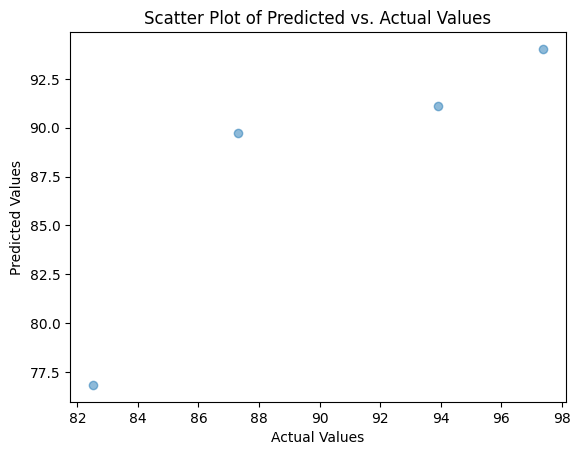

In [40]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs. Actual Values')
plt.show()


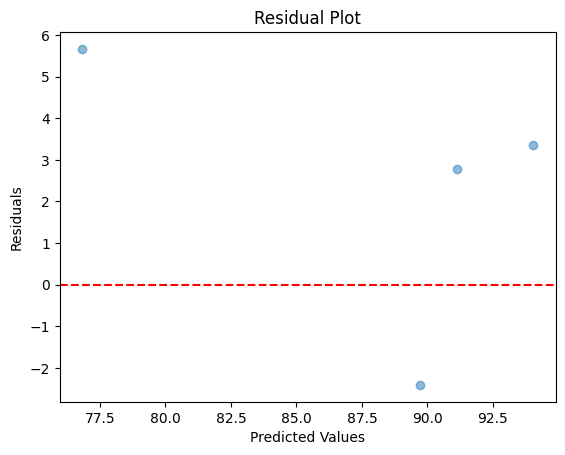

In [42]:
# Calculate residuals
residuals = y_test - y_pred

# Residual plot
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.show()


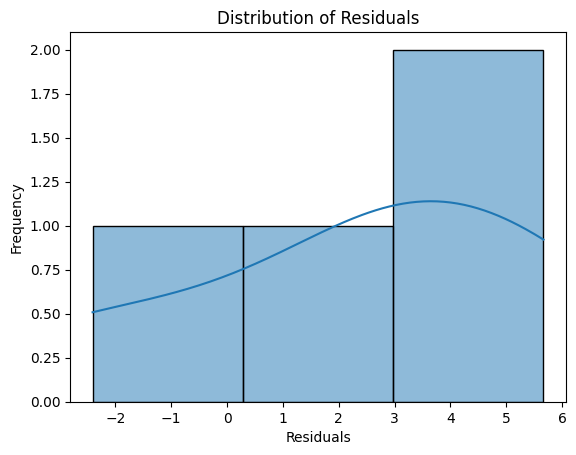

In [44]:
import seaborn as sns

# Distribution of residuals
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


C:\Users\Adity\miniconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Adity\miniconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Adity\miniconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Adity\miniconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Adity\miniconda3\lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings

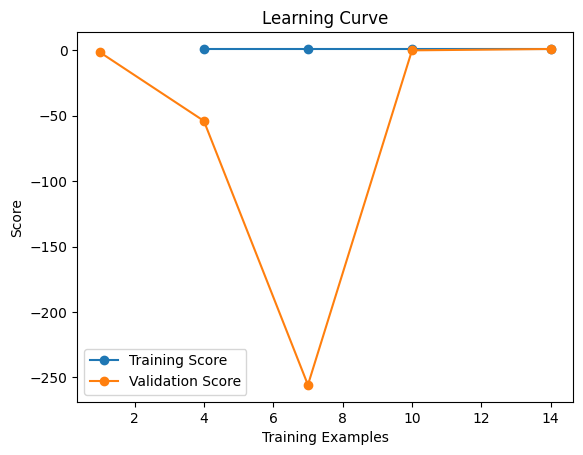

In [52]:
import numpy as np
from sklearn.model_selection import learning_curve

# Replace 'model' with your actual trained regression model
train_sizes, train_scores, test_scores = learning_curve(regression_model, X, y, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()
